# 수치형 데이터 시각화

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 히스토그램

<AxesSubplot:xlabel='age', ylabel='Count'>

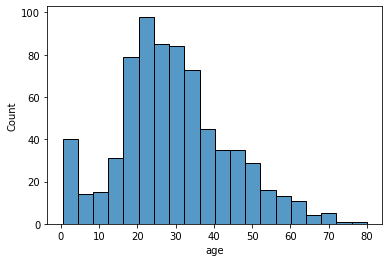

In [3]:
sns.histplot(data = titanic, x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

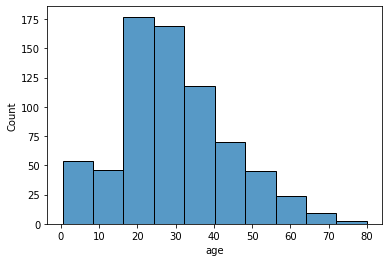

In [4]:
sns.histplot(data=titanic, x='age', bins=10)

<AxesSubplot:xlabel='age', ylabel='Count'>

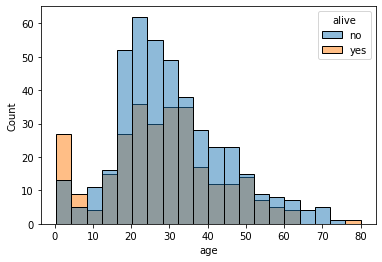

In [6]:
# 수치형 + 범주형
sns.histplot(data=titanic, x='age', hue='alive')

<AxesSubplot:xlabel='age', ylabel='Count'>

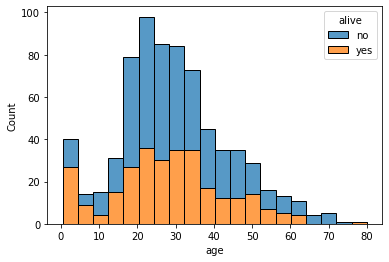

In [7]:
# 수치형 + 범주형 누적으로 표현
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack')

## 커널밀도추정 함수 그래프
히스토그램을 매끄럽게 곡선으로 연결한 그래프

<AxesSubplot:xlabel='age', ylabel='Density'>

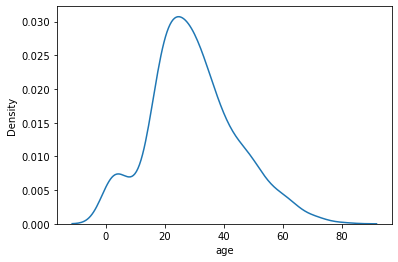

In [8]:
sns.kdeplot(data=titanic, x='age')

<AxesSubplot:xlabel='age', ylabel='Density'>

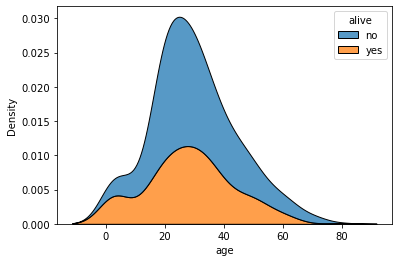

In [9]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

## 분포도

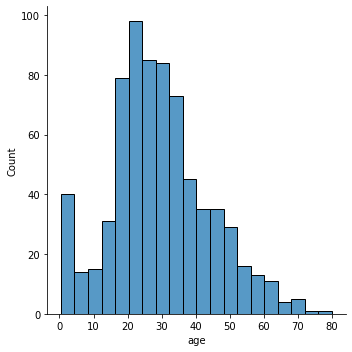

In [12]:
# 파라미터를 기본값으로 두면 히스토그램을 그림
sns.displot(data = titanic, x='age')

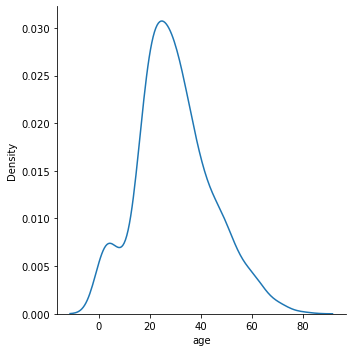

In [13]:
sns.displot(data=titanic, x='age', kind = 'kde')

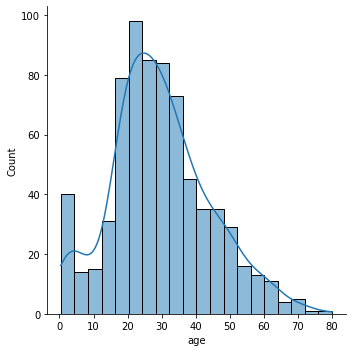

In [14]:
sns.displot(data=titanic, x='age', kde=True)

## 러그플롯
주변 분포를 나타내는 그래프, 단독으로 사용하기보다는 주로 다른 분포도 그래프와 함꼐 사용

<AxesSubplot:xlabel='age', ylabel='Density'>

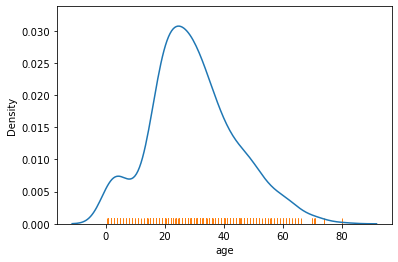

In [16]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

# 범주형 데이터 시각화

In [17]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

## 막대 그래프
평균과 신뢰구간 보여줌  
x : 범주형 데이터, y : 수치형 데이터

<AxesSubplot:xlabel='class', ylabel='fare'>

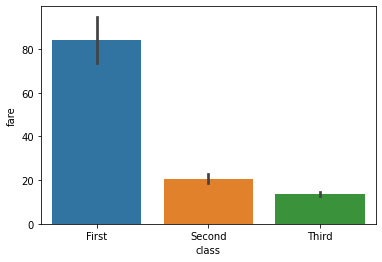

In [18]:
sns.barplot(x='class', y='fare', data=titanic)

## 포인트 플롯
막대 그래프와 모양만 다를 뿐 동일한 정보 제공(한 화면에 여러 그래프 그릴때 추천)

<AxesSubplot:xlabel='class', ylabel='fare'>

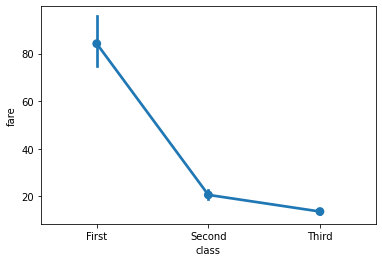

In [19]:
sns.pointplot(x='class', y='fare', data=titanic)

## 박스 플롯

<AxesSubplot:xlabel='class', ylabel='age'>

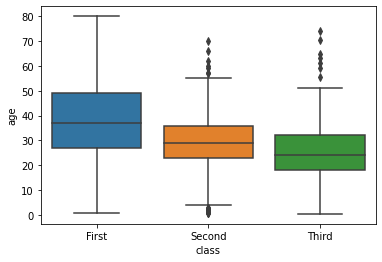

In [20]:
sns.boxplot(x='class', y='age', data=titanic)

## 바이올린 플롯
박스 플롯 + 커널밀도추정 함수 그래프

<AxesSubplot:xlabel='class', ylabel='age'>

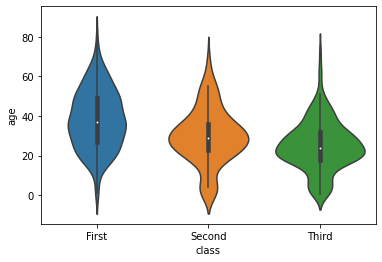

In [21]:
sns.violinplot(x='class', y='age', data=titanic)

<AxesSubplot:xlabel='class', ylabel='age'>

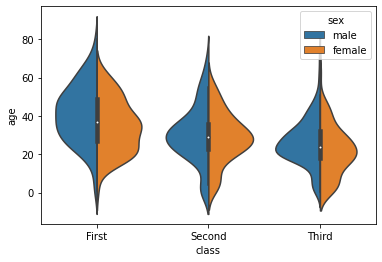

In [22]:
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split = True)

## 카운트 플롯

<AxesSubplot:xlabel='class', ylabel='count'>

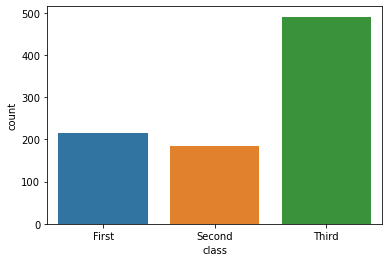

In [23]:
sns.countplot(x='class', data = titanic)

<AxesSubplot:xlabel='count', ylabel='class'>

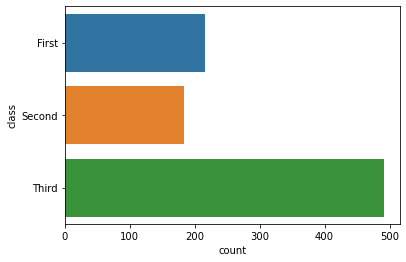

In [24]:
sns.countplot(y='class', data= titanic)

## 파이 그래프

([<matplotlib.patches.Wedge at 0x243ba7de790>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

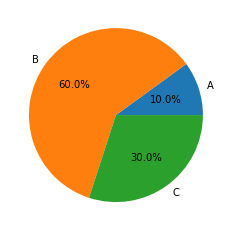

In [26]:
import matplotlib.pyplot as plt

x = [10, 60, 30]
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')

# 데이터 관계 시각화

## 히트맵
데이터 간 관계를 색상으로 표현  
비교해야 할 데이터가 많을 떄 주로 사용

In [27]:
import seaborn as sns

flights = sns.load_dataset('flights')

In [28]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
flights_pivot = flights.pivot(index='month',
                             columns='year',
                             values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

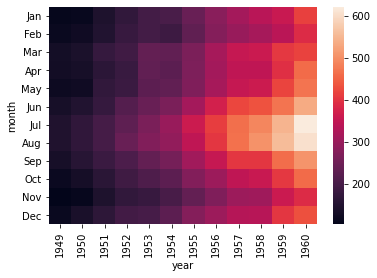

In [32]:
sns.heatmap(data=flights_pivot)

## 라인 플롯
두 수치형 데이터 사이의 관계를 나타냄

<AxesSubplot:xlabel='year', ylabel='passengers'>

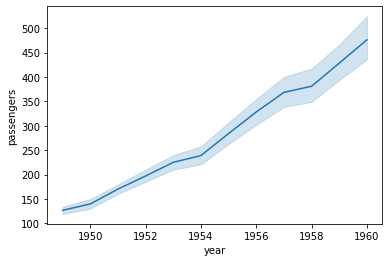

In [33]:
sns.lineplot(x='year', y='passengers', data=flights)

## 산점도
두 데이터의 관계를 점으로 표현하는 그래프

In [34]:
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

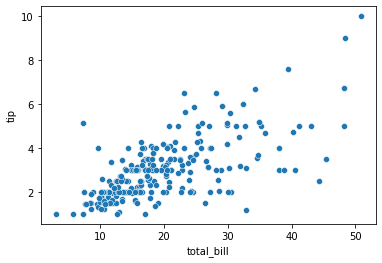

In [36]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

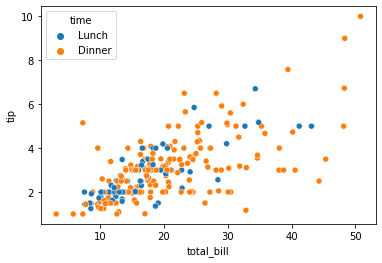

In [37]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

회귀선을 포함한 산점도 그래프

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

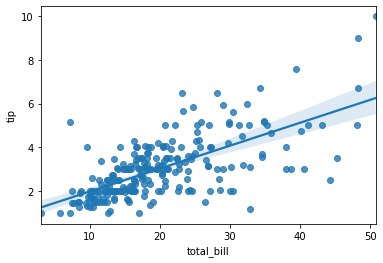

In [38]:
sns.regplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

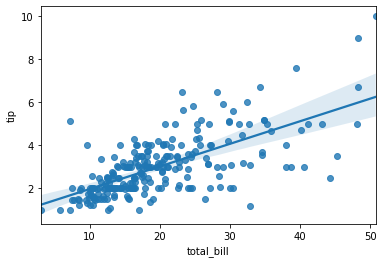

In [39]:
# 신뢰구간 99%
sns.regplot(x='total_bill', y='tip', ci=99, data=tips)

# 결측치 시각화

In [ ]:
import missingno as msno

msno.bar(df=dataframe)

msno.matrix(df=dataframe)